# Lesson: Natural Language Processing - EXPLORATION

<a href = "https://www.canva.com/design/DAFmeYEK1zQ/Fqr6k9NfwToipJqyFmeXXg/view?utm_content=DAFmeYEK1zQ&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">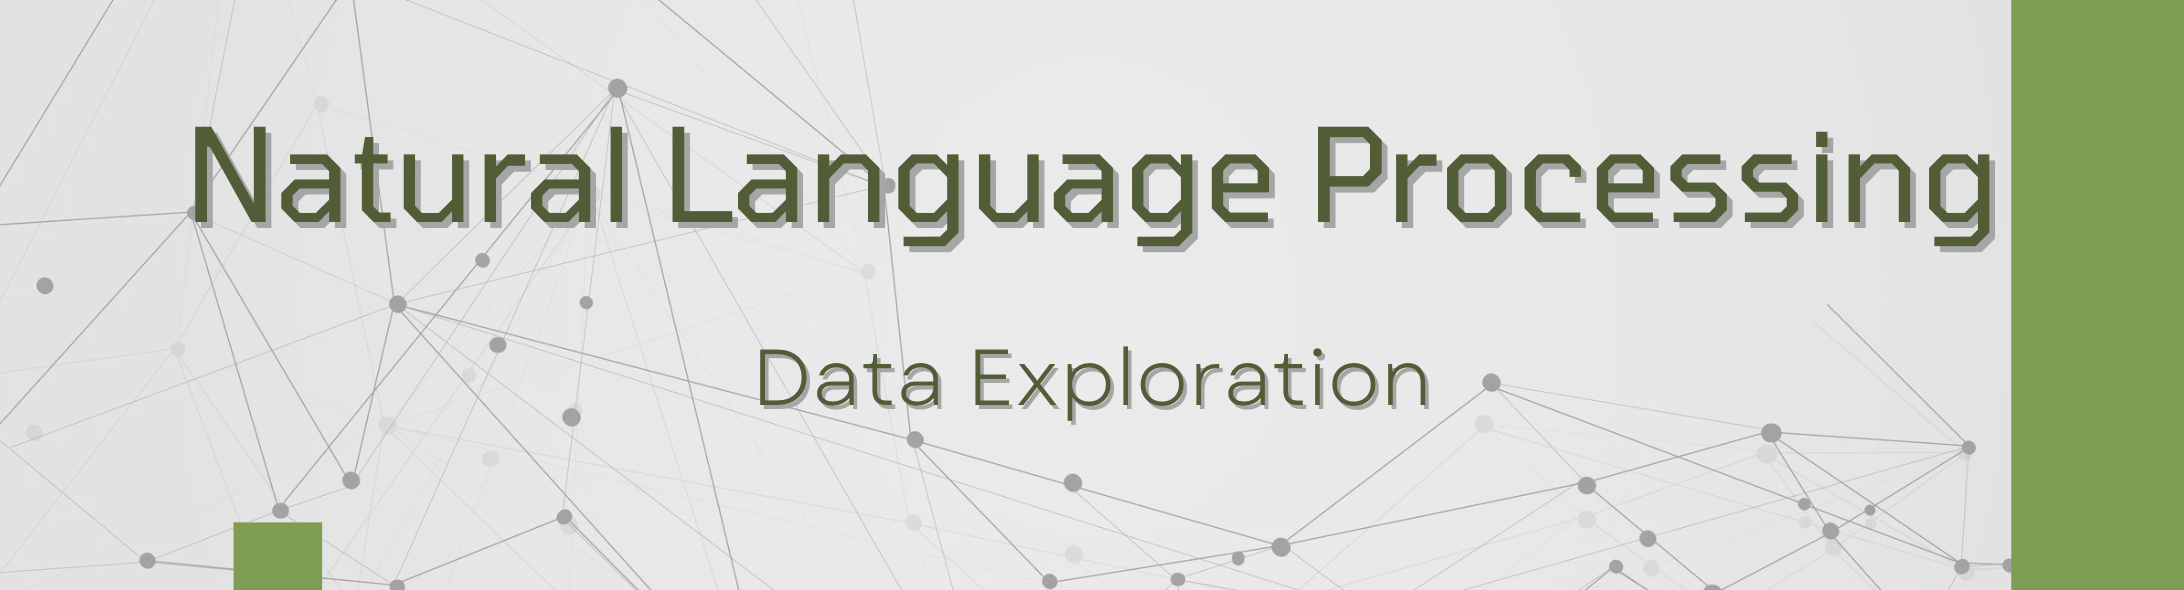
</a>

<hr style="border:2px solid gray">

# NLP EDA

Basically, exploration and modeling boil down to a single question:

How do we quantify our data/text

In this lesson, we'll explore answers to this question that will aid in visualization.

- word frequency (by label)
- ngrams
- word cloud
- sentiment analysis
- other common features

## Setup

Data is spam/ham text messages.

<a href = "https://pypi.org/project/wordcloud/">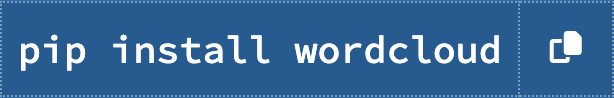</a>

In [1]:
#Imports
import re

import unicodedata
import nltk
from wordcloud import WordCloud

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#from env import get_connection_url

In [2]:
def get_connection_url(db, username=os.getenv('sqlUSER'), host=os.getenv('sqlHOST'), password=os.getenv('sqlPSWD')):
    """
    This function will:
    - take username, pswd, host credentials from imported env module
    - output a formatted connection_url
    """
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'


In [3]:
#Get SQL database url
url = get_connection_url('spam_db')

In [4]:
#Define SQL query
query = '''
        SELECT *
        FROM spam
        '''

In [5]:
#Read SQL
df = pd.read_sql(query, url, index_col='id')
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
pd.set_option("display.max_colwidth", None)

In [7]:
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [8]:
#Value counts of labels
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### If we look at this in the context of a classification problem,
we may ask:
 - What leads to a spam text?
 - What leads to a ham text?
 

In [9]:
df.iloc[1].text

'Ok lar... Joking wif u oni...'

In [10]:
# recall how the string method join operates -- glues together 
# all instances inside of a iterable using whatever is specified
# ahead of the method call:
# english: glue these words together with a empty space
' '.join(['this ', 'is ', 'a ', 'list of strings'])

'this  is  a  list of strings'

In [22]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', '4', 'ltgt']

def clean(text):
    '''
    A simple function to cleanup text data.
    
    Args:
        text (str): The text to be cleaned.
        
    Returns:
        list: A list of lemmatized words after cleaning.
    '''
    
    # basic_clean() function from last lesson:
    # Normalize text by removing diacritics, encoding to ASCII, decoding to UTF-8, and converting to lowercase
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    
    # Remove punctuation, split text into words
    words = re.sub(r'[^\w\s]', '', text).split()
    
    
    # lemmatize() function from last lesson:
    # Initialize WordNet lemmatizer
    wnl = nltk.stem.WordNetLemmatizer()
    
    # Combine standard English stopwords with additional stopwords
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    
    # Lemmatize words and remove stopwords
    cleaned_words = [wnl.lemmatize(word) for word in words if word not in stopwords]
    
    return cleaned_words

In [23]:
# we can do that process with a join on a Series and not just a list
# we will do that for ham words, spam words, and all words
# we will pass our basic cleaning on top of that
ham_words = clean(' '.join(df[df.label == 'ham']['text']))
spam_words = clean(' '.join(df[df.label == 'spam']['text']))
all_words = clean(' '.join(df['text']))

In [78]:
' '.join(df['text'])

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more?

In [24]:
#ham_words

In [25]:
len(all_words), len(spam_words), len(ham_words)

(50018, 12044, 37974)

In [26]:
spam_words

['free',
 'entry',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'ratetcs',
 'apply',
 '08452810075over18s',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'a150',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'a900',
 'prize',
 'reward',
 'claim',
 'call',
 '09061701461',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobile',
 '11',
 'month',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobile',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chance',
 'win',
 'cash',
 '100',
 '20000',
 'pound',
 'txt',
 'csh11',
 'send',
 '87575',
 'cost',
 '150pday',
 '6days',
 '16',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'a100000',
 'pr

In [27]:
# let's get some sights on word frequency by taking our words back apart
# we will split each set of words by the spaces,
# turn that into a list, cast that list as a Series,
# and then take the value counts of that Series
# We will do this for each type of word present
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [28]:
spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [29]:
ham_freq.head(5)

im      449
get     314
go      273
ok      272
dont    257
dtype: int64

## Exploration

Represent text as word frequencies.
- concat all frequencies together into a dataframe

In [30]:
# pd.concat([ham_freq, spam_freq, all_freq], axis=1
#      ).fillna(0).astype(int)

,0,1,2
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279
...,...,...,...
resub,0,1,1
expired,0,1,1
9153,0,1,1
okmail,0,1,1


In [31]:
# lets combine all 3 dfs horizontally
# fill any missing values with zero
# convert the resulting df to contain only integer values:

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1
         ).fillna(0).astype(int)

# rename the col names
word_counts.columns = ['ham','spam','all']

word_counts.head()

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279


In [32]:
word_counts.sample(5).head()

,ham,spam,all
special,32,11,43
sayy,1,0,1
dearslp,2,0,2
rajitha,1,0,1
waiti,1,0,1


- What are the most frequently occuring words?
- Are there any words that uniquely identify a spam or ham message? 
    - (*I.e. words present in one type of message but not the other?*)

In [20]:
# sort by 'all'

word_counts.sort_values('all', ascending=False)

,ham,spam,all
call,241,359,600
im,449,13,462
get,314,83,397
ur,240,144,384
go,273,31,304
...,...,...,...
edition,1,0,1
algorithm,1,0,1
textbook,1,0,1
3230,1,0,1


In [21]:
# sort by 'ham' and 'spam' columns
word_counts.sort_values(['ham','spam', 'all'], ascending=False)

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279
...,...,...,...
resub,0,1,1
expired,0,1,1
9153,0,1,1
okmail,0,1,1


### Visualization

- ham vs spam count for 20 most common words
- ham vs spam proportion for 20 most common words

In [35]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

<div class="alert alert-info" role="alert">

the following code sorts the DataFrame word_counts based on the values in the 'all' column in descending order, 
    
- selects the 'ham' and 'spam' columns, 
- retrieves the top 20 rows, and then 
- creates a horizontal bar plot of those rows. 
    
The resulting plot represents the frequencies or counts of 'ham' and 'spam' for the top 20 words in the dataset.
    
</div>

In [39]:
#word_counts.sort_values('all', ascending=False)[['ham', 'spam']].head(20)

,ham,spam
call,241,359
im,449,13
get,314,83
ur,240,144
go,273,31
dont,257,22
ok,272,5
free,59,216
know,241,26
come,242,5


<AxesSubplot:>

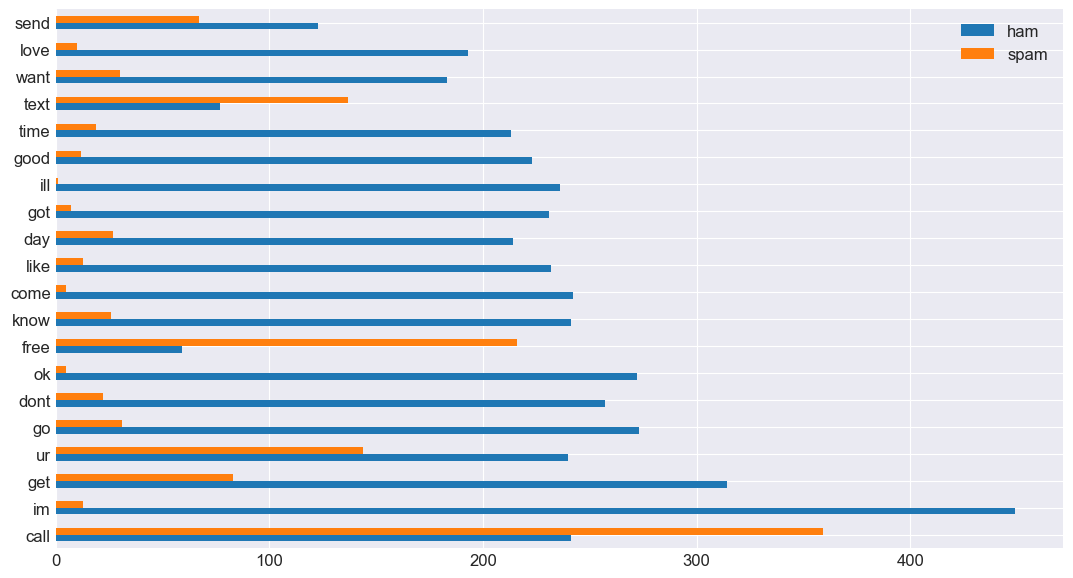

In [36]:
word_counts.sort_values('all', ascending=False)[['ham', 'spam']].head(20).plot.barh()

<div class="alert alert-info" role="alert">

The resulting DataFrame contains the ratios for the top 20 rows, representing the proportion of each value in the row relative to the total count in the 'all' column.
    
</div>

In [23]:
word_counts.sort_values('all', ascending=False).head(20)\
 .apply(lambda row: row/row['all'], axis = 1)

,ham,spam,all
call,0.401667,0.598333,1.0
im,0.971861,0.028139,1.0
get,0.790932,0.209068,1.0
ur,0.625000,0.375000,1.0
go,0.898026,0.101974,1.0
4,0.585366,0.414634,1.0
dont,0.921147,0.078853,1.0
ok,0.981949,0.018051,1.0
free,0.214545,0.785455,1.0
know,0.902622,0.097378,1.0


<div class="alert alert-info" role="alert">

This plots a horizontal bar chart using the DataFrame. 
- The bars are stacked, indicating the proportion of 'ham' and 'spam' for each word. 
- The parameters width=1 and ec='k' control the width of the bars and the color of the bar edges, respectively. 
- The legend=False parameter hides the legend.
    
</div>

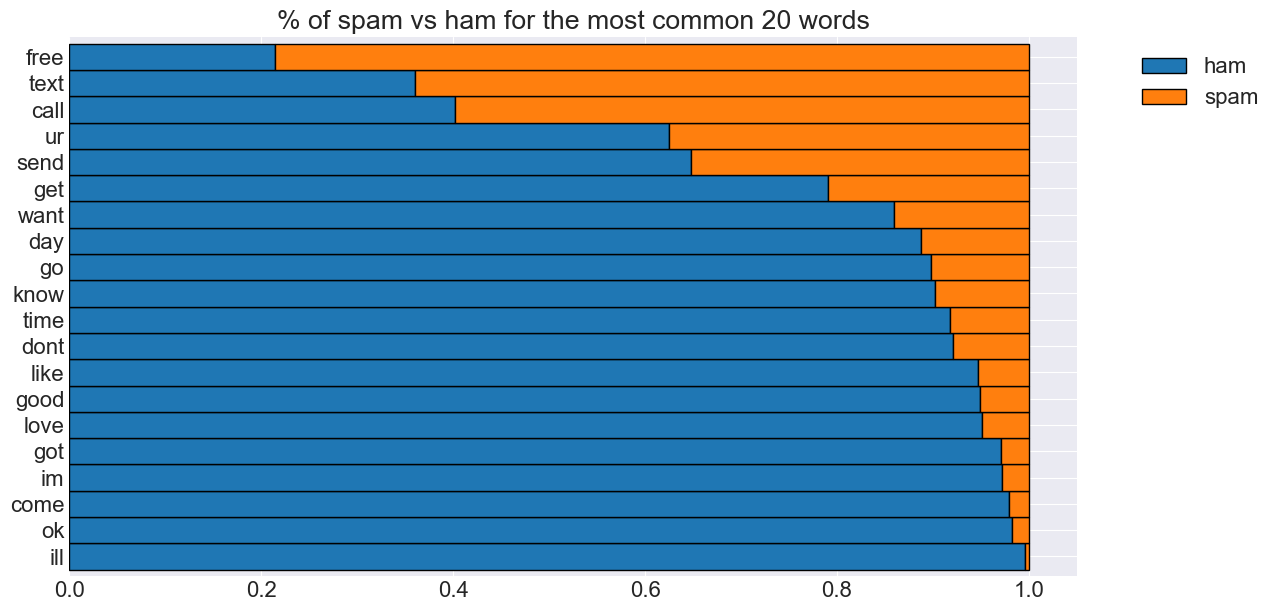

In [56]:
(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'black') # or ec="k"
)
plt.title('% of spam vs ham for the most common 20 words')
plt.legend(bbox_to_anchor=(1.2, 1.0),loc='upper right')
plt.show()

## n-grams

**bigram**: combinations of 2 words

Represent text as combinations of 2 words

In [57]:
sentence = 'Today is Monday ! ! ! and the weather is nice .'

In [58]:
list(nltk.bigrams(sentence.split()))

[('Today', 'is'),
 ('is', 'Monday'),
 ('Monday', '!'),
 ('!', '!'),
 ('!', '!'),
 ('!', 'and'),
 ('and', 'the'),
 ('the', 'weather'),
 ('weather', 'is'),
 ('is', 'nice'),
 ('nice', '.')]

**Be Careful!** Make sure you are making bigrams out of *words*.

- what are the most common bigrams? 
    - spam bigrams? 
    - ham bigrams?
    
- visualize 20 most common bigrams, most common ham bigrams
- ngrams

Find the most common bigram and then find a representative text

In [59]:
list(nltk.ngrams(sentence.split(), 3))

[('Today', 'is', 'Monday'),
 ('is', 'Monday', '!'),
 ('Monday', '!', '!'),
 ('!', '!', '!'),
 ('!', '!', 'and'),
 ('!', 'and', 'the'),
 ('and', 'the', 'weather'),
 ('the', 'weather', 'is'),
 ('weather', 'is', 'nice'),
 ('is', 'nice', '.')]

<AxesSubplot:>

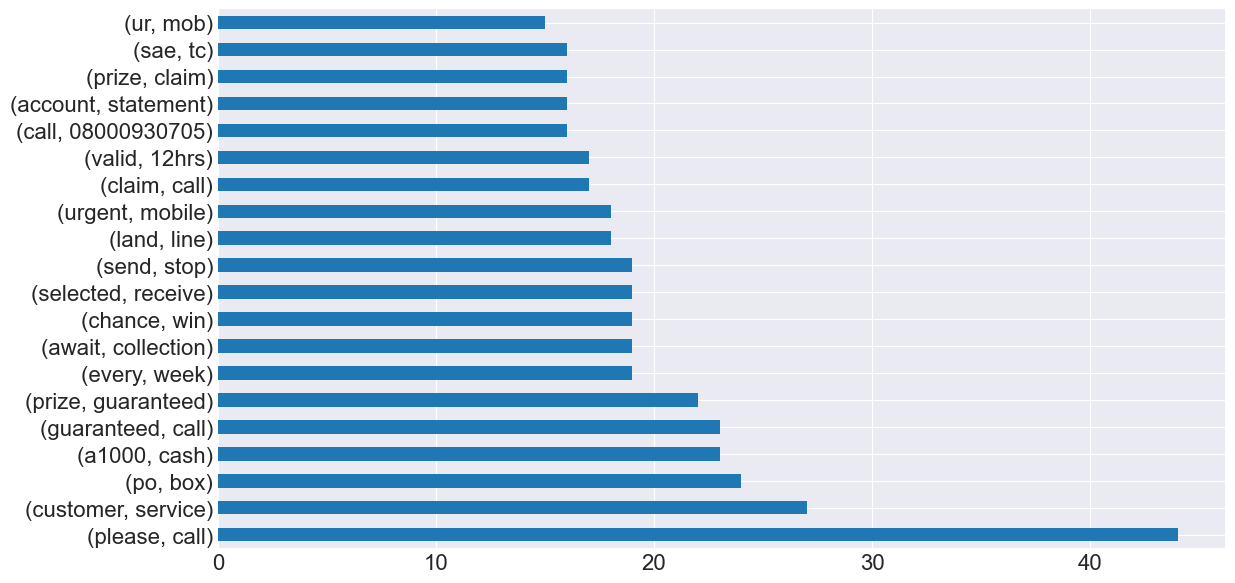

In [60]:
pd.Series(nltk.bigrams(spam_words)
         ).value_counts().head(20).plot.barh()

# <a href = "https://amueller.github.io/word_cloud/"> Word Cloud</a>
**Making a word cloud:**
1. call `WordCloud.generate` 
1. reference a string with all words, not a list or series
1. call `plt.imshow` on the generation from wordcloud

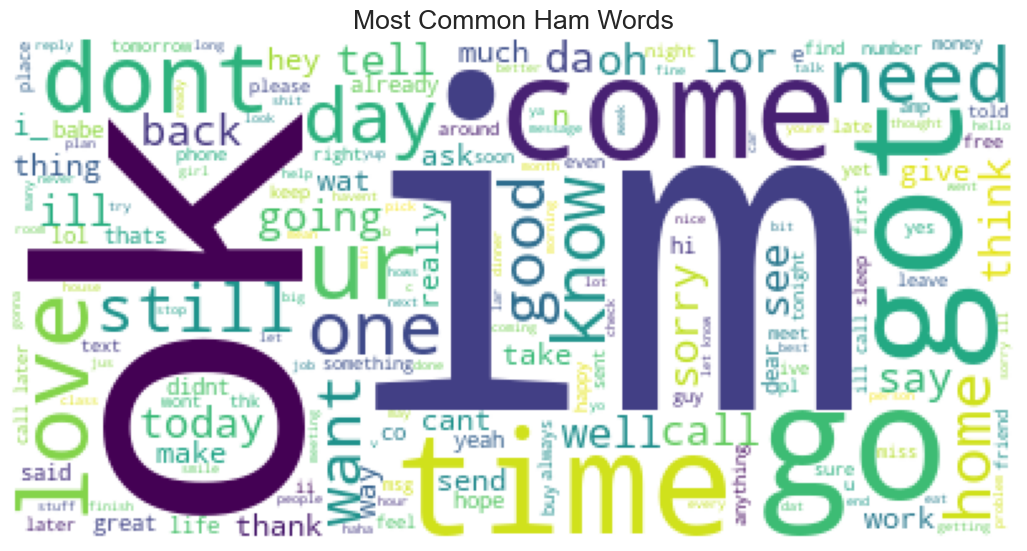

In [61]:
img = WordCloud(background_color='white').generate(' '.join(ham_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Ham Words')
plt.show()

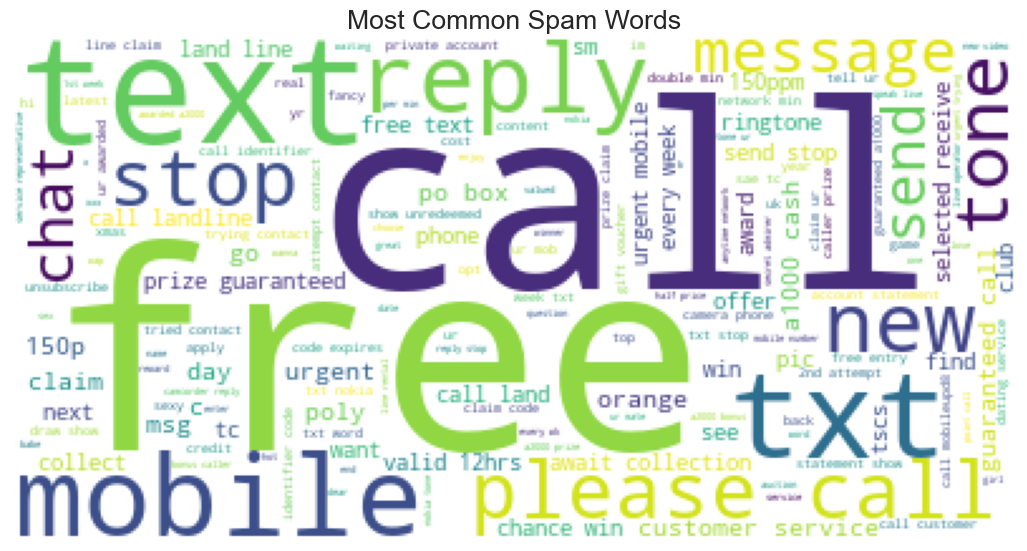

In [62]:
img = WordCloud(background_color='white').generate(' '.join(spam_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Spam Words')
plt.show()

## Other Common Features

Any NLP dataset will have domain specific features, for example: number of retweets, number of @mentions, number of upvotes, or mean time to respond to a support chat. In addition to these domain specific features, some common measures for a document are:

- character count
- word count
- sentence count
- stopword count
- unique word count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio

Create one or more of the above features and visualize it.

In [63]:
# add two new columns 'message_length' and 'word_count'

df['message_length'] = df['text'].str.len()

In [35]:
# consider running a t_test_ind
# spam vs ham message length

In [36]:
# we apply our clean function, apply len chained on it
# if we did not want to clean this before word count, we would want to do a split on it
df['word_count'] = df.text.apply(clean).apply(len)

In [37]:
df.head()

,label,text,message_length,word_count
id,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111,16
1,ham,Ok lar... Joking wif u oni...,29,5
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,22
3,ham,U dun say so early hor... U c already then say...,49,7
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,8


## Sentiment

A number indicating whether the document is positive or negative.

- knowledge-based + statistical approach
- relies on human-labelled data
    - combination of qualitative and quantitative methods
    - then empirically validate
- different models for diff domains (e.g. social media vs news)
- for social media
    - Afinn ([github](https://github.com/fnielsen/afinn) + [whitepaper](http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf))
    - Vader ([github](https://github.com/cjhutto/vaderSentiment) + [whitepaper](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)) `nltk.sentiment.vader.SentimentIntensityAnalyzer`. Pre-trained sentiment analyzer (**V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner).)


From your terminal:
`python -c 'import nltk;nltk.download("vader_lexicon")'`

or 

`python3 -c 'import nltk;nltk.download("vader_lexicon")'`

In [64]:
import nltk.sentiment
# we call nltk.sentiment.SentimentIntensityAnalyser()
# use polarity_scores from that object

sia = nltk.sentiment.SentimentIntensityAnalyzer()

sia.polarity_scores('He is really good')

{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4927}

In [65]:
sia.polarity_scores(
    'The food is good but service is slow')

{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.2382}

In [66]:
sia.polarity_scores('I hate you')

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [67]:
sia.polarity_scores('I hate you :)')

{'neg': 0.481, 'neu': 0.13, 'pos': 0.39, 'compound': -0.1779}

In [68]:
sia.polarity_scores('I hate hate speech')

{'neg': 0.881, 'neu': 0.119, 'pos': 0.0, 'compound': -0.8126}

Things that can influence Sentiment Score:
1. Punctuations. Can increase the intensity
2. Capitalization. Can increase the intensity
3. Degree modifiers
4. Conjunctions

It can handle Emojis and slangs

Apply this to the text message data

In [69]:
# grab the sentiment from each of the texts as they stand:
# apply a lambda function on each cell in the text column:
# polarity_score's value associtated with the "compound"
# key for each score
df['sentiment'] = df['text'].apply(lambda doc: sia.polarity_scores(doc)['compound'])
df.head()

,label,text,message_length,sentiment
id,,,,
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,0.6249
1,ham,Ok lar... Joking wif u oni...,29,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,0.7964
3,ham,U dun say so early hor... U c already then say...,49,0.0000
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,-0.1027


<div class="alert alert-info" role="alert">

1. `.apply(lambda doc: sia.polarity_scores(doc)['compound'])`: This applies a lambda function to each element in the 'text' column. 
- The lambda function takes a document (doc) as input and uses the SentimentIntensityAnalyzer (sia) to calculate the compound sentiment score for that document. 
- The compound score represents the overall sentiment polarity of the text, ranging from -1 (extremely negative) to 1 (extremely positive).

The code essentially calculates the compound sentiment score for each text document in the 'text' column using the SentimentIntensityAnalyzer. The result is a new Series containing the compound scores for each document.
- The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).
    
</div>

In [70]:
# is the mean and median values of sentiment score different for ham vs spam?
df.groupby('label').sentiment.agg(['mean','median'])

,mean,median
label,,
ham,0.152218,0.0000
spam,0.436018,0.6107


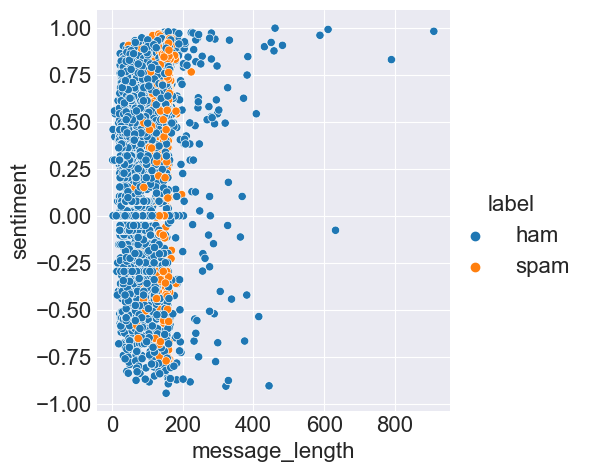

In [71]:
#plot message_length vs sentiment and hue by label
sns.relplot(data = df, x = 'message_length', 
            y = 'sentiment', hue = 'label')

<div class="alert alert-info" role="alert">

Plot univariate or bivariate distributions using <a href ="https://seaborn.pydata.org/generated/seaborn.kdeplot.html">kernel density estimation</a>.
    
Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. Like a histogram, the quality of the representation also depends on the selection of good smoothing parameters.
    
</div>

In [73]:
df

,label,text,message_length,sentiment
id,,,,
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,0.6249
1,ham,Ok lar... Joking wif u oni...,29,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,0.7964
3,ham,U dun say so early hor... U c already then say...,49,0.0000
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,-0.1027
...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",161,0.8805
5568,ham,Will Ì_ b going to esplanade fr home?,37,0.0000
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",57,-0.2960


In [72]:
df[df.label == 'ham'].sentiment

id
0       0.6249
1       0.4767
3       0.0000
4      -0.1027
6      -0.1331
         ...  
5565    0.0000
5568    0.0000
5569   -0.2960
5570    0.8934
5571    0.7579
Name: sentiment, Length: 4825, dtype: float64

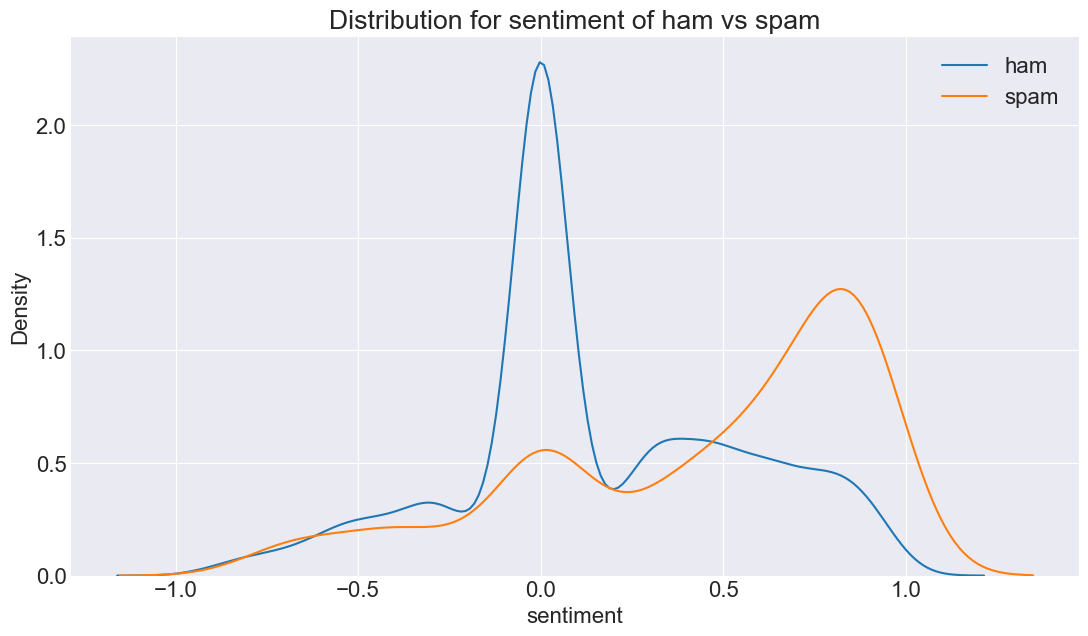

In [74]:
# is the distribution for sentiment different for ham vs spam

sns.kdeplot(df[df.label == 'ham'].sentiment, label = 'ham')
sns.kdeplot(df[df.label == 'spam'].sentiment, label = 'spam')
plt.legend(['ham', 'spam'])
plt.title("Distribution for sentiment of ham vs spam")
plt.show()

<div class="alert alert-info" role="alert">

- `levels = 30`: This parameter sets the number of contour levels to be drawn in the KDE plot. In this case, it creates 30 contour levels.

- `shade = True`: This parameter specifies whether to shade the areas under the KDE curve. Setting it to True adds shading to the plot.

- `alpha=0.75`: This parameter sets the transparency level of the shading. A value of 0.75 means that the shading will be partially transparent.
    
</div>

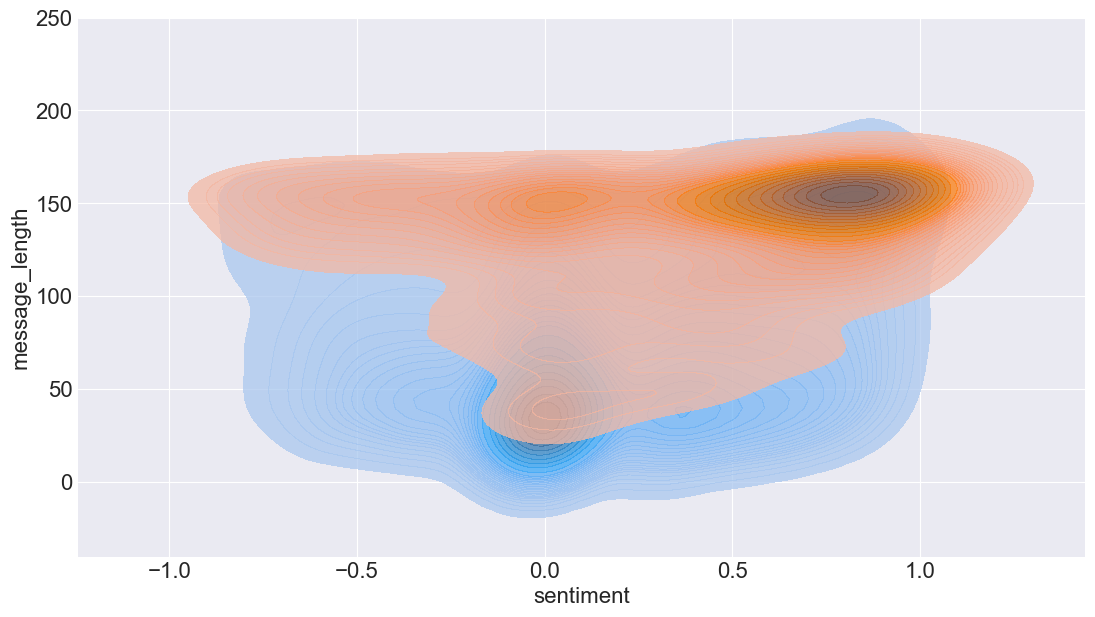

In [77]:
# Bivariate KDE plot for message_length vs sentiment score 
sns.kdeplot(
    x=df[df.label == 'ham'].sentiment,
    y=df[df.label == 'ham'].message_length, 
    levels = 30, shade = True, alpha=0.75);
sns.kdeplot(
    x=df[df.label == 'spam'].sentiment,
    y=df[df.label == 'spam'].message_length, 
    levels = 30, shade = True, alpha=0.75)
plt.ylim(top=250)
plt.show()

### Takeaways:
 - Spam messages seem to have roughly the same message length, where ham varies a lot.
 - Spam messages have a very positive sentiment
 - If we wanted to utilize these features for modeling, we would want to proceed forward with means testing to establish their viability

## More Resources

- [kaggle wikipedia movie plots](https://www.kaggle.com/jrobischon/wikipedia-movie-plots)
    - Suggestion: narrow to top n genres that aren't unknown
- [wikitable extractor](https://wikitable2csv.ggor.de/) (Try with, e.g. [helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes))
- [Textblob library](https://textblob.readthedocs.io/en/dev/)